### Questions for Analysis:
1. Do movies with high popularity achive high revenvue?
2. What are the most filmed genres in this whole dataset?
3. Is there a correlation between a movie budget and its revenue?

In [307]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [309]:
#load dataset
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Data Cleaning

In [312]:
tmdb.shape #dataset currently has 10866 rows and 21 columns

(10866, 21)

In [314]:
#information about dataset
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Drop Unncessary Columns

In [317]:
#dropping unncessary columns
tmdb.drop(columns=['original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj','revenue_adj'], inplace=True)

In [319]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015


#### Drop Duplicate Values

In [322]:
#finding out the number of unique values per column (specifically id should be unique)
tmdb.nunique()

id              10865
imdb_id         10855
popularity      10814
budget            557
revenue          4702
runtime           247
genres           2039
vote_count       1289
vote_average       72
release_year       56
dtype: int64

In [324]:
#drop the one unique row with duplicate id (size of rows goes from 10866 to 10865)
tmdb.drop_duplicates(keep='first', inplace=True)
tmdb.shape

(10865, 10)

#### Drop Missing Values

In [327]:
tmdb.isna().sum()

id               0
imdb_id         10
popularity       0
budget           0
revenue          0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [329]:
tmdb.dropna(axis=0, inplace=True)

In [331]:
tmdb.isna().sum()

id              0
imdb_id         0
popularity      0
budget          0
revenue         0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
dtype: int64

#### Update Genre Column

In [334]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015


In [336]:
#edit genre column to only consider genre as first in list.
tmdb['genres'] = tmdb['genres'].apply(lambda x: x.split("|")[0])
tmdb.head()

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,120,Action,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action,2947,7.3,2015


#### Add Profit Column

In [339]:
tmdb['profit'] = tmdb['revenue']-tmdb['budget']
tmdb.head()

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,profit
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action,5562,6.5,2015,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,120,Action,6185,7.1,2015,228436354
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure,2480,6.3,2015,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action,5292,7.5,2015,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action,2947,7.3,2015,1316249360


#### Categorize Some Columns

In [342]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10834.000000,10834.000000,1.083400e+04,1.083400e+04,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04
mean,65811.569042,0.647776,1.466613e+07,3.994086e+07,102.162728,217.970833,5.973159,2001.308196,2.527472e+07
std,91927.169054,1.001316,3.094857e+07,1.171561e+08,31.265059,576.368151,0.933831,12.815839,9.671971e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,10587.250000,0.208387,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00
50%,20541.500000,0.384587,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00
75%,75146.000000,0.715768,1.500000e+07,2.417932e+07,111.000000,146.000000,6.600000,2011.000000,9.287084e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09


In [344]:
def categorize(tmdb, column, labels):
    limits = [tmdb[column].describe()['min'],
              tmdb[column].describe()['25%'],
              tmdb[column].describe()['50%'],
              tmdb[column].describe()['75%'],
              tmdb[column].describe()['max']]

    tmdb[column] = pd.cut(tmdb[column], limits, labels = labels, duplicates='drop')
    return tmdb

In [346]:
#dategorize vote_average column
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize(tmdb, 'vote_average', labels)

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,profit
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action,5562,average,2015,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,120,Action,6185,popular,2015,228436354
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure,2480,average,2015,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action,5292,popular,2015,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action,2947,popular,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,95,Documentary,11,popular,1966,0
10862,20379,tt0060472,0.065543,0,0,176,Action,20,below_avg,1966,0
10863,39768,tt0060161,0.065141,0,0,94,Mystery,11,average,1966,0
10864,21449,tt0061177,0.064317,0,0,80,Action,22,not_popular,1966,0


In [348]:
tmdb['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [350]:
tmdb.dropna(inplace=True)

In [352]:
tmdb['vote_average'].isna().sum()

0

In [354]:
#categorize profit column
labels2 = ['low', 'average', 'high']
categorize(tmdb, 'profit', labels2)

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,profit
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action,5562,average,2015,high
1,76341,tt1392190,28.419936,150000000,378436354,120,Action,6185,popular,2015,high
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure,2480,average,2015,high
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action,5292,popular,2015,high
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action,2947,popular,2015,high
...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,87,Comedy,13,popular,1966,low
10861,21,tt0060371,0.080598,0,0,95,Documentary,11,popular,1966,low
10862,20379,tt0060472,0.065543,0,0,176,Action,20,below_avg,1966,low
10863,39768,tt0060161,0.065141,0,0,94,Mystery,11,average,1966,low


In [356]:
tmdb['profit'].isna().sum()

1

In [358]:
tmdb.dropna(inplace=True)

In [360]:
tmdb['profit'].isna().sum()

0

### Data Exploratory
1. Do movies with high popularity achive high revenvue?
2. What are the most filmed genres in this whole dataset?
3. Is there a correlation between a movie budget and its revenue?

In [363]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,profit
0,135397,tt0369610,32.985763,150000000,1513528810,124,Action,5562,average,2015,high
1,76341,tt1392190,28.419936,150000000,378436354,120,Action,6185,popular,2015,high
2,262500,tt2908446,13.112507,110000000,295238201,119,Adventure,2480,average,2015,high
3,140607,tt2488496,11.173104,200000000,2068178225,136,Action,5292,popular,2015,high
4,168259,tt2820852,9.335014,190000000,1506249360,137,Action,2947,popular,2015,high


#### 1. Do movies with high popularity achive high revenvue?

Yes, with higher popularity, movies achieve higher revenue.

In [400]:
#find average popularity
avg_pop = tmdb['popularity'].mean()

In [404]:
less_pop = tmdb[tmdb['popularity']<avg_pop]
more_pop = tmdb[tmdb['popularity']>avg_pop]

In [409]:
avg_rev_less = less_pop['revenue'].mean()
avg_rev_more = more_pop['revenue'].mean()

In [411]:
print(avg_rev_less, avg_rev_more)

7723784.02340535 121979703.35188216


#### 2. What are the most filmed genres in this whole dataset?
The most filed genre is Drama and the lease is Foreign. Some other most filmed genres are Comedy, Action, Horror, and Adventure.

In [416]:
most_filmed = tmdb['genres'].value_counts()
most_filmed

genres
Drama              2453
Comedy             2318
Action             1586
Horror              914
Adventure           584
Thriller            491
Documentary         431
Animation           402
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music                99
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: count, dtype: int64

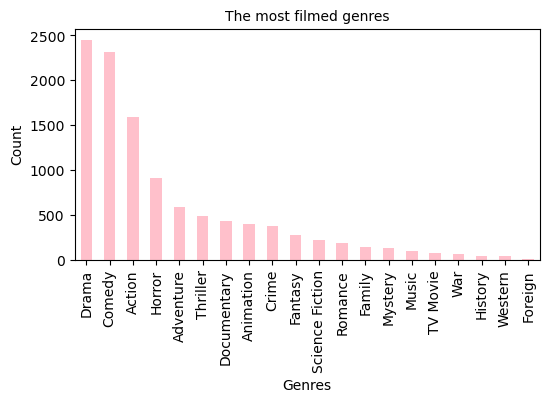

In [418]:
plt.figure(figsize=(6,3))
most_filmed.plot(kind="bar", color="pink")
plt.title("The most filmed genres", fontsize=10)
plt.xlabel("Genres", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

#### 3. Is there a correlation between a movie budget and its revenue?
Yes, there is a clear correlation b/w move budget and revenue where the higher the budget, the higher the movie revenue. However, there is a few outliers.

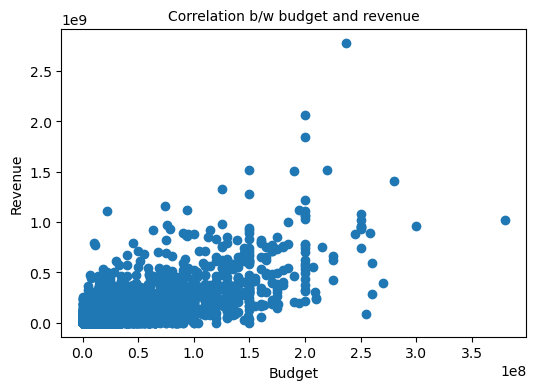

In [421]:
plt.figure(figsize=(6,4))
plt.scatter(tmdb['budget'], tmdb['revenue'])
plt.title("Correlation b/w budget and revenue", fontsize=10)
plt.xlabel("Budget", fontsize=10)
plt.ylabel("Revenue", fontsize=10)
plt.show()